# Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import pickle
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import matthews_corrcoef
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from skle

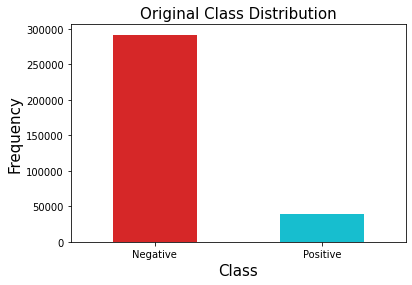

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


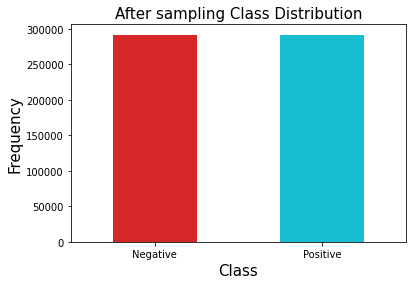

In [ ]:
#Model 3: Using GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,VotingClassifier 
def Model3(X_over, y_over,X_test,test):
    #  clf1 = RandomForestClassifier(n_estimators=200)
    #  clf3= ExtraTreesClassifier(n_estimators=200)
    #  clf2= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
    #  eclf = VotingClassifier(estimators=[('rf', clf1), ('e', clf2), ('g', clf3)],voting='hard')
    #  clf1 = clf1.fit(X_over, y_over)
    #  clf2 = clf2.fit(X_over, y_over)
    #  clf3 = clf3.fit(X_over, y_over)
    #  eclf = eclf.fit(X_over, y_over)
    # pickle.dump(eclf, open('/content/drive/My Drive/BDMH/model3.sav', 'wb'))
     eclf = pickle.load(open('/content/drive/My Drive/BDMH/model3.sav', 'rb'))
     ypred=eclf.predict(X_test)
     ypp = pd.DataFrame(index=test['Sequence'])
     ypp['label']=ypred
     ypp.to_csv (r'/content/drive/My Drive/result3.csv', index = False, header=True) #for saving as csv in drive

#Model 2: Using ExtraTreesClassifier
def Model2(X_over, y_over,X_test,test):
    #  etcf = ExtraTreesClassifier(n_estimators=200)
    #  etcf.fit(X_over, y_over)
    #  pickle.dump(etcf, open('/content/drive/My Drive/BDMH/model2.sav', 'wb'))
     etcf = pickle.load(open('/content/drive/My Drive/BDMH/model2.sav', 'rb'))
     ypred=etcf.predict(X_test)
     ypp = pd.DataFrame(index=test['Sequence'])
     ypp['label']=ypred
     ypp.to_csv (r'/content/drive/My Drive/result2.csv', index = False, header=True) #for saving as csv in drive

#Model 1: Using RandomForestClassifier
def Model1(X_over, y_over,X_test,test):
    #  rfc = RandomForestClassifier(n_estimators=200)
    #  rfc.fit(X_over, y_over)
    #  pickle.dump(rfc, open('/content/drive/My Drive/BDMH/model1.sav', 'wb'))
     rfc = pickle.load(open('/content/drive/My Drive/BDMH/model1.sav', 'rb'))
     ypred=rfc.predict(X_test)
     ypp = pd.DataFrame(index=test['Sequence'])
     ypp['label']=ypred
     ypp.to_csv (r'/content/drive/My Drive/result1.csv', index = False, header=True) #for saving as csv in drive

def method2(data,test): #method2 for encoding
     AminoAcids = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
     DictAminoAcids = {'A':0,'C':1,'D':2,'E':3,'F':4,'G':5,'H':6,'I':7,'K':8,'L':9,'M':10,'N':11,'P':12,'Q':13,'R':14,'S':15,'T':16,'V':17,'W':18,'Y':19}
     
     zeroArray = np.zeros((data.shape[0],340))
     zeroArray = zeroArray.astype('int')
     X_train = pd.DataFrame(zeroArray)
     for row in range(data.shape[0]):
       for aa in range(0,16):
        charAtpos = data.iloc[row]['Sequence'][aa]
        if charAtpos !='X': #exclude X as it is padding
          pt = DictAminoAcids[charAtpos]
          X_train.iloc[row][pt*17+aa] = 1

     zeroArray = np.zeros((test.shape[0],340))
     zeroArray = zeroArray.astype('int')
     X_test = pd.DataFrame(zeroArray)
     for row in range(test.shape[0]):
       for aa in range(0,16):
         charAtpos = test.iloc[row]['Sequence'][aa]
         if charAtpos !='X': #exclude X as it is padding
           pt = DictAminoAcids[charAtpos]
           X_test.iloc[row][pt*17+aa] = 1
     return X_train,X_test

#encoding method1
def item_encoding(data,dict1):
  new_list = []
  for i in data['Sequence'].values:
    t = []
    for j in i:
      t.append(dict1.get(j, 0))
    new_list.append(np.array(t))
  return new_list


#runner function for the models
def main(data,test):
     # pre-processing the dataset, split the dataset in X and y
     X = np.array(data.Sequence)
     y = np.array(data.label)
     X=pd.DataFrame(X,columns=['Sequence'])#for cmplt data
     y=pd.DataFrame(y,columns=['label'])#for cmplt data

     # plotting the Original Class Distribution before sampling
     count_classes = pd.value_counts(y['label'], sort = True)
     count_classes.plot(kind = 'bar', rot=0,color=['tab:red','tab:cyan'])
     plt.xticks([1, 0], ('Positive', 'Negative'))
     plt.title("Original Class Distribution",fontsize=15)
     plt.xlabel("Class",fontsize=15)
     plt.ylabel("Frequency",fontsize=15)
     plt.show()
     plt.close()

     #create the features for test and train data
     #X_train,X_test = method2(data,test)
     list1=[]
     for i in data['Sequence']:
        for j in i:
          if j not in list1:
            list1.append(j) #amino acids present
     dict1 = {}
     for i, val in enumerate(list1):
      dict1[val] = i+1  #dictionary for amino acids

     #print(dict1)
     #print("Length of dict:", len(dict1))
     X_train = item_encoding(data,dict1) #encoded data
     X_test = item_encoding(test,dict1)  #encoded data

     # performing random-over sampling
     oversample = RandomOverSampler(random_state=42)
     X_over1, y_over1 =oversample.fit_resample(X_train,y)

     # plotting OverSampled Class Distribution
     count_classes = pd.value_counts(y_over1, sort = True)
     count_classes.plot(kind = 'bar', rot=0,color=['tab:red','tab:cyan'])
     plt.xticks([1, 0], ('Positive', 'Negative'))
     plt.title("After sampling Class Distribution",fontsize=15)
     plt.xlabel("Class",fontsize=15)
     plt.ylabel("Frequency",fontsize=15)
     plt.show()
     plt.close()

     #applying models
     
     Model1(X_over1, y_over1, X_test,test)
     Model2(X_over1, y_over1, X_test,test)
     Model3(X_over1, y_over1, X_test,test)

# Load the dataset from the drive
data = pd.read_csv('/content/drive/MyDrive/BDMH/RNA_Train.csv')
test = pd.read_csv('/content/drive/MyDrive/BDMH/test.csv')
main(data,test)